# Artur Kompała

**Zadanie 1. - Przygotowanie zbioru**

Przygotuj wybrany zestaw danych w formacie RSES (jeśli to możliwe, użyj zestawów danych z poprzedniego
laboratorium)

In [39]:
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
from sklearn.tree import _tree
from sklearn.metrics import accuracy_score

# --- Wczytanie danych ---
df = pd.read_csv("nowy.csv", sep=',')
df['Potability'] = df['Potability'].astype(int)

# --- Podział na cechy i etykiety ---
X = df.drop('Potability', axis=1)
Y = df['Potability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Zadanie 2. - Generowanie drzewa i indukcja reguł**

Wygeneruj drzewo decyzyjne, a następnie przeprowadź indukcję reguł decyzyjnych z drzewa.
Skorzystaj z udostępnionego kodu w Pythonie lub własnej implementacji.
Opisz szczegółowo, jakie parametry zostały użyte do wygenerowania drzewa decyzyjnego:
* Algorytm budowy drzewa (np. ID3, C4.5, CART)
* Maksymalna głębokość drzewa (jeśli ograniczono)
* Minimalna liczba próbek w liściu
* Inne parametry wpływające na strukturę drzewa (np. miara jakości podziału: entropia, Gini)
Uzasadnij, dlaczego wybrane parametry zostały użyte.

Dokładność modelu (drzewo): 0.6111111111111112


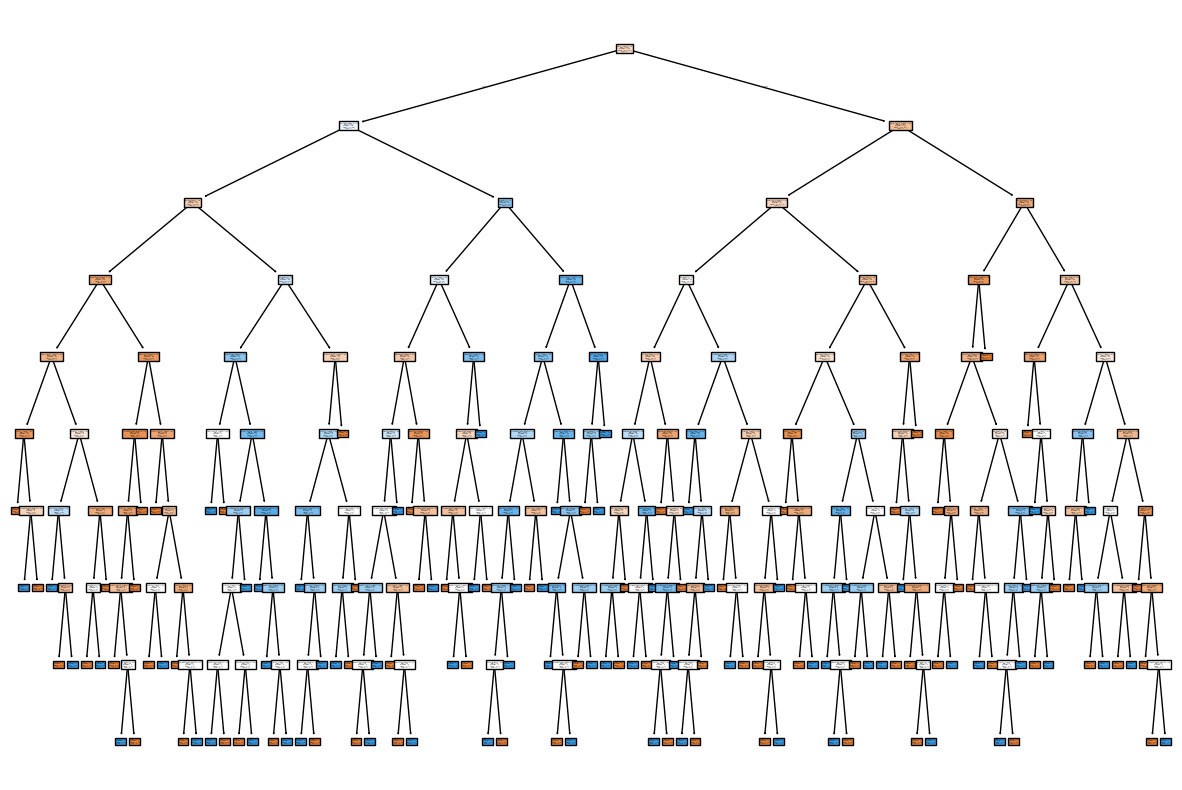


Wyindukowano łącznie 139 reguł. Oto 5 przykładowych:
Reguła 1: JEŚLI (Solids_range1 <= 0.50) AND (Hardness_range1 <= 0.50) AND (Sulfate_range1 <= 0.50) AND (Chloramines_range2 <= 0.50) AND (Organic_carbon_range2 <= 0.50) AND (Turbidity_range2 <= 0.50) TO Klasa: 0
Reguła 2: JEŚLI (Solids_range1 <= 0.50) AND (Hardness_range1 <= 0.50) AND (Sulfate_range1 <= 0.50) AND (Chloramines_range2 <= 0.50) AND (Organic_carbon_range2 <= 0.50) AND (Turbidity_range2 > 0.50) AND (Trihalomethanes_range1 <= 0.50) TO Klasa: 1
Reguła 3: JEŚLI (Solids_range1 <= 0.50) AND (Hardness_range1 <= 0.50) AND (Sulfate_range1 <= 0.50) AND (Chloramines_range2 <= 0.50) AND (Organic_carbon_range2 <= 0.50) AND (Turbidity_range2 > 0.50) AND (Trihalomethanes_range1 > 0.50) TO Klasa: 0
Reguła 4: JEŚLI (Solids_range1 <= 0.50) AND (Hardness_range1 <= 0.50) AND (Sulfate_range1 <= 0.50) AND (Chloramines_range2 <= 0.50) AND (Organic_carbon_range2 > 0.50) AND (Turbidity_range2 <= 0.50) AND (Conductivity_range1 <= 0.50) TO Klasa: 

In [40]:
# --- Generowanie drzewa  ---
model = DecisionTreeClassifier(random_state=42, criterion='gini',min_samples_leaf= 1, max_depth=None)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu (drzewo):", accuracy)

# Wizualizacja
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.show()

# --- INDUKCJA REGUŁ  ---
def retrieve_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    rules = []

    def recurse(node, depth, current_rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            # Lewe dziecko (warunek <=)
            recurse(tree_.children_left[node], depth + 1, current_rule + [(name, "<=", threshold)])
            # Prawe dziecko (warunek >)
            recurse(tree_.children_right[node], depth + 1, current_rule + [(name, ">", threshold)])
        else:
            # Liść (decyzja)
            value = tree_.value[node]
            class_name = class_names[np.argmax(value)]
            rules.append((current_rule, class_name))

    recurse(0, 1, [])
    return rules

# Wyciągnięcie reguł
induced_rules = retrieve_rules(model, X.columns, [str(c) for c in model.classes_])

# Wyświetlenie 5 przykładowych reguł
print(f"\nWyindukowano łącznie {len(induced_rules)} reguł. Oto 5 przykładowych:")
for i, (conditions, prediction) in enumerate(induced_rules[:5]):
    cond_str = " AND ".join([f"({feat} {op} {val:.2f})" for feat, op, val in conditions])
    print(f"Reguła {i+1}: JEŚLI {cond_str} TO Klasa: {prediction}")

Opis parametrów:
* Algorytm budowy drzewa: Użyto algorytmu CART (domyślny w bibliotece scikit-learn), który buduje drzewa binarne.

* Maksymalna głębokość drzewa: Parametr max_depth ustawiono na None (domyślnie), co oznacza brak ograniczenia głębokości – drzewo rośnie, aż liście będą czyste.

* Minimalna liczba próbek w liściu: Domyślnie min_samples_leaf=1.

* Miara jakości podziału: Domyślnie criterion='gini' (Wskaźnik Giniego), który minimalizuje prawdopodobieństwo błędnej klasyfikacji losowego elementu.

* Uzasadnienie: Wybór domyślnych parametrów pozwala algorytmowi na pełne dopasowanie do danych treningowych w celu znalezienia wszystkich możliwych wzorców, co jest kluczowe przy indukcji reguł, aby uzyskać szczegółową bazę wiedzy (nawet kosztem ryzyka przeuczenia, które weryfikujemy później).

**Zadanie 3. - Podsumowanie i analiza reguł**

Opisz uzyskane reguły z punktu widzenia reprezentacji wiedzy:
* Liczba reguł
* Średnia liczba warunków w regule
* Najkrótsza i najdłuższa reguła pod względem liczby warunków


In [41]:
# Analiza reguł
num_rules = len(induced_rules)
rule_lengths = [len(cond) for cond, pred in induced_rules]
avg_length = np.mean(rule_lengths)
min_length = np.min(rule_lengths)
max_length = np.max(rule_lengths)

print("--- Podsumowanie Reguł ---")
print(f"Liczba reguł: {num_rules}")
print(f"Średnia liczba warunków w regule: {avg_length:.2f}")
print(f"Najkrótsza reguła (liczba warunków): {min_length}")
print(f"Najdłuższa reguła (liczba warunków): {max_length}")

--- Podsumowanie Reguł ---
Liczba reguł: 139
Średnia liczba warunków w regule: 7.63
Najkrótsza reguła (liczba warunków): 4
Najdłuższa reguła (liczba warunków): 9


**Zadanie 4. - Klasyfikacja w python + rses z wyindukowanych  wcześniej reguł z drzewa**

Wykonaj klasyfikację przy użyciu modelu w formie reguł decyzyjnych (wyindukowanych wcześniej z drzewa)),
określając parametry klasyfikacji

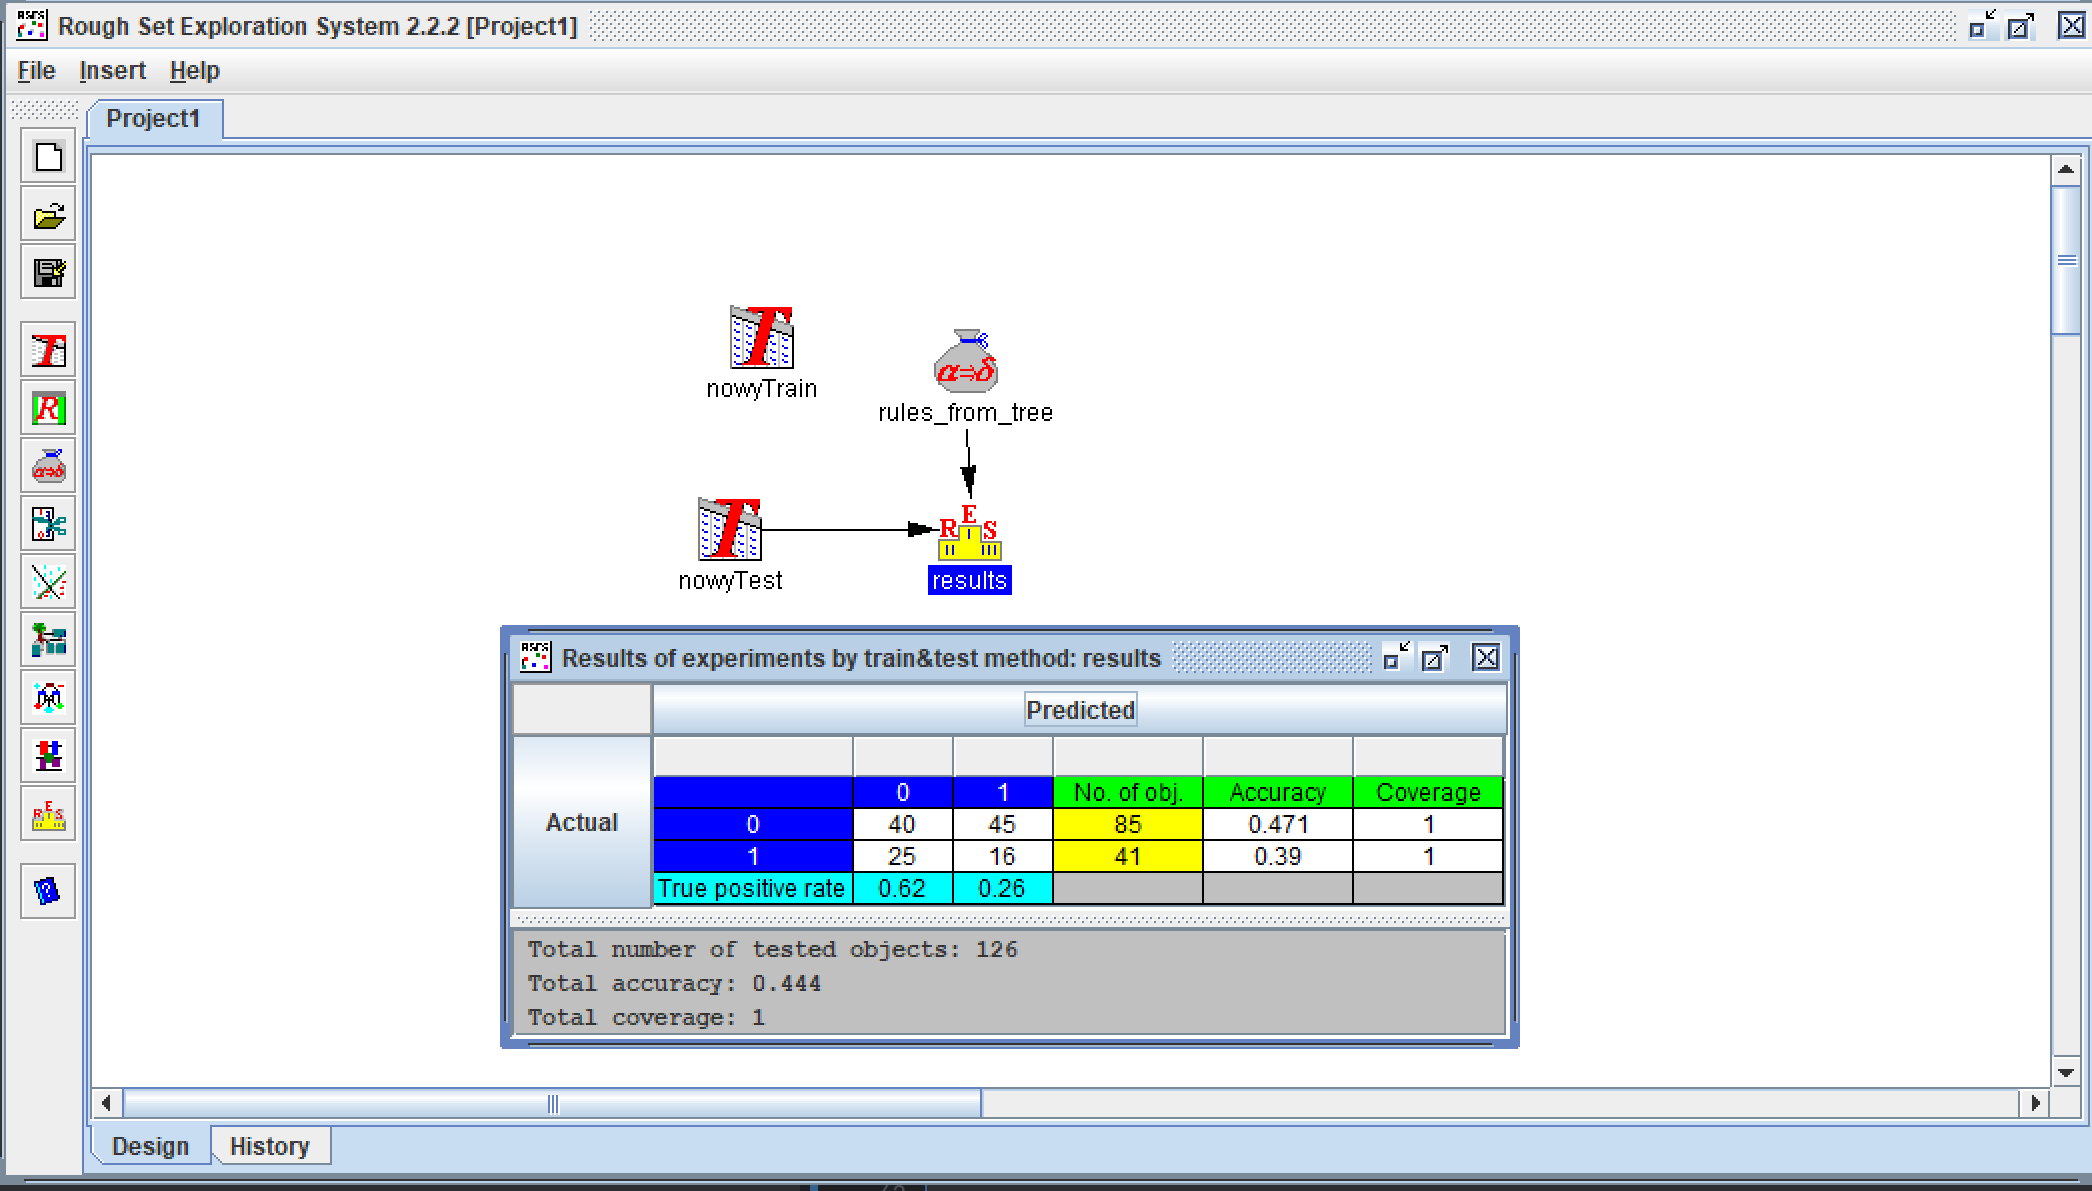

In [42]:
# Funkcja klasyfikująca pojedynczą próbkę na podstawie listy reguł
def predict_with_rules(row, rules):
    for conditions, prediction in rules:
        match = True
        for feature, op, threshold in conditions:
            value = row[feature]
            if op == "<=":
                if not (value <= threshold):
                    match = False
                    break
            elif op == ">":
                if not (value > threshold):
                    match = False
                    break
        if match:
            return int(prediction)
    return None

# Klasyfikacja zbioru testowego przy użyciu reguł
y_pred_rules = x_test.apply(lambda row: predict_with_rules(row, induced_rules), axis=1)

# Ocena
accuracy_rules = accuracy_score(y_test, y_pred_rules)
print(f"Dokładność klasyfikatora opartego na regułach: {accuracy_rules:.4f}")

Dokładność klasyfikatora opartego na regułach: 0.6111


**Zadanie 5. - Analiza wyników**

Przedstaw podsumowanie w formie tabeli opisującej parametry zbioru danych oraz uzyskane wyniki
klasyfikacji, w przypadku walidacji krzyżowej podaj odchylenie standardowe.

In [43]:
from sklearn.model_selection import cross_val_score

# Walidacja krzyżowa (5-krotna)
cv_scores = cross_val_score(model, X, Y, cv=5)
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

# Przygotowanie tabeli podsumowującej
summary_data = {
    "Parametr": [
        "Liczba próbek",
        "Liczba atrybutów",
        "Liczba wyindukowanych reguł",
        "Dokładność",
        "Średnia dokładność",
        "Odchylenie std."
    ],
    "Wartość": [
        len(df),
        len(X.columns),
        num_rules,
        f"{accuracy_rules:.4f}",
        f"{mean_cv_accuracy:.4f}",
        f"{std_cv_accuracy:.4f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Parametr,Wartość
0,Liczba próbek,419
1,Liczba atrybutów,18
2,Liczba wyindukowanych reguł,139
3,Dokładność,0.6111
4,Średnia dokładność,0.5869
5,Odchylenie std.,0.0550
